In [1]:
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [2]:
dataset_name = 'winequality_red'
shapes = {
    'S': (9,6,4),
    'V2': (5,),
    'V3': (4,),
    'V4': (3,)
}
epochs = 50
num_tries = 6

random_seed = 42
random_seeds = random.sample(range(0, 4294967295), num_tries)
curr_try = -1

def datasets_generator_fun():
    global curr_try
    global random_seeds
    global dataset_name
    curr_try += 1
    curr_try = curr_try % num_tries
    return get_validation_datasets(dataset_name, random_seed=random_seeds[curr_try], feature_range=(0,1), test_ratio=0)
    
    
dataset_shapes = get_dataset_shapes(dataset_name)
print(dataset_shapes)

([11], [1])


### S(X,X,X)

Average elapsed k-fold validation time: 38.23872 sec
Last measures: [0.25575000047683716, 0.33387500047683716, 0.017880577594041824, 0.030131494626402855, 0.27811911702156067, 0.25575000047683716, 0.018321001902222633, 0.01839769259095192, 0.017347590997815132, 0.024030575528740883, 0.016636040061712265, 0.33387500047683716, 0.2906250059604645, 0.3616250157356262, 0.27811911702156067, 0.25575000047683716, 0.027192246168851852, 0.018084082752466202, 0.01731574721634388, 0.27811911702156067, 0.25575000047683716, 0.01819869875907898, 0.2906250059604645, 0.3616250157356262, 0.0183853916823864, 0.25575000047683716, 0.33387500047683716, 0.018031582236289978, 0.017574919387698174, 0.27811911702156067]
Loss history average: [0.27628201 0.2526062  0.22125246 0.19273152 0.18350609 0.18126283
 0.17997831 0.17893852 0.17806169 0.17731743 0.1766865  0.17615214
 0.17569925 0.17531433 0.17498588 0.17470376 0.17446034 0.17424876
 0.17406357 0.17390012 0.17375502 0.17362526 0.17350859 0.17340286
 0.173

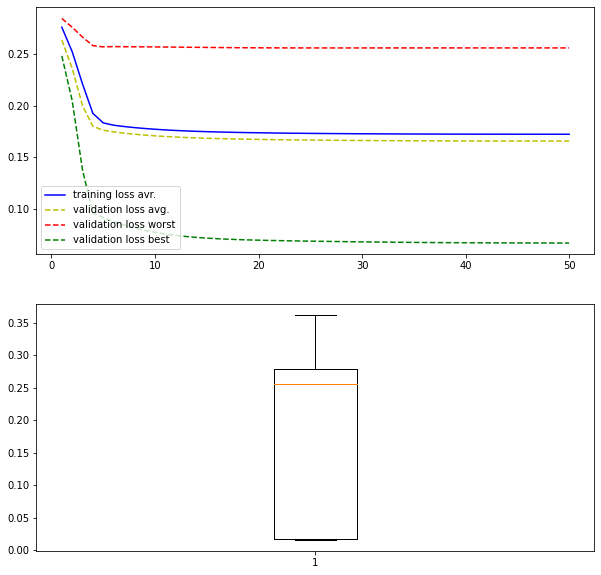

In [3]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=shapes['S'], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(2)

Average elapsed k-fold validation time: 48.95400 sec
Last measures: [0.01915040984749794, 0.027419399470090866, 0.2906250059604645, 0.01777186430990696, 0.024027613922953606, 0.25575000047683716, 0.33387500047683716, 0.2906250059604645, 0.017011726275086403, 0.27811911702156067, 0.018410565331578255, 0.33387500047683716, 0.2906250059604645, 0.020181406289339066, 0.01988242007791996, 0.017112305387854576, 0.33387500047683716, 0.020194049924612045, 0.3616250157356262, 0.02402886189520359, 0.25575000047683716, 0.33387500047683716, 0.018897883594036102, 0.019796518608927727, 0.27811911702156067, 0.25575000047683716, 0.33387500047683716, 0.018547507002949715, 0.017706116661429405, 0.01812121644616127]
Loss history average: [0.26457159 0.24124259 0.21765879 0.1944927  0.17565656 0.16484551
 0.15994535 0.15792771 0.15695264 0.15636526 0.15599342 0.15574138
 0.1555541  0.15540049 0.15526435 0.15513892 0.15501796 0.15490072
 0.1547852  0.1546693  0.15455225 0.15443527 0.15431955 0.15420608
 0.1

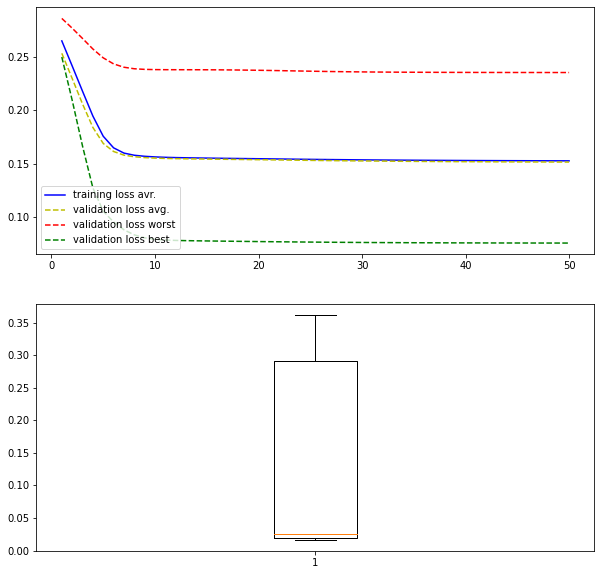

In [4]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V2'], inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(2)

Average elapsed k-fold validation time: 56.99064 sec
Last measures: [0.25575000047683716, 0.01947088912129402, 0.022219454869627953, 0.02024965174496174, 0.01916445605456829, 0.018487224355340004, 0.33387500047683716, 0.01980399526655674, 0.3616250157356262, 0.0189643744379282, 0.25575000047683716, 0.01971375197172165, 0.02210080996155739, 0.3616250157356262, 0.018981175497174263, 0.25575000047683716, 0.021981772035360336, 0.2906250059604645, 0.018308063969016075, 0.019412977620959282, 0.25575000047683716, 0.33387500047683716, 0.022172128781676292, 0.3616250157356262, 0.020770329982042313, 0.25575000047683716, 0.021832777187228203, 0.019875114783644676, 0.3616250157356262, 0.020438464358448982]
Loss history average: [0.264949   0.23270465 0.19778376 0.16537583 0.14549043 0.138653
 0.13712041 0.13680581 0.13672317 0.13665038 0.13657396 0.13649699
 0.13641995 0.13634271 0.13626514 0.1361871  0.13610848 0.13602919
 0.13594913 0.1358682  0.13578633 0.13570346 0.13561951 0.13553443
 0.13544

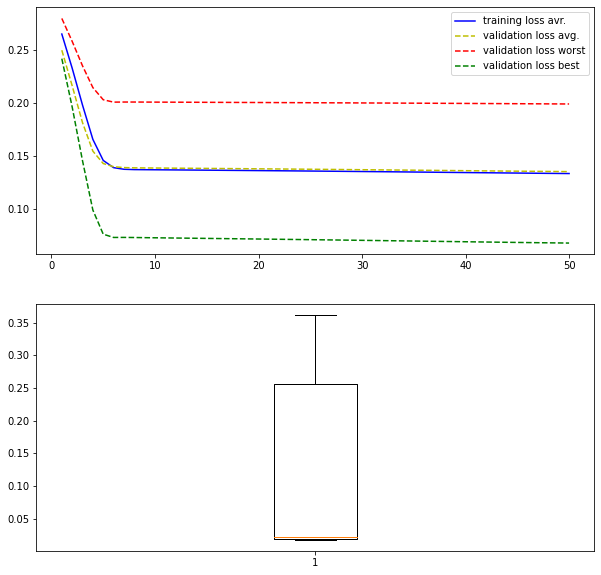

In [5]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V2'], inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(3)

Average elapsed k-fold validation time: 49.37008 sec
Last measures: [0.25575000047683716, 0.33387500047683716, 0.2906250059604645, 0.017770707607269287, 0.01958027295768261, 0.25575000047683716, 0.01847224496304989, 0.020468294620513916, 0.016656583175063133, 0.27811911702156067, 0.018719997256994247, 0.33387500047683716, 0.2906250059604645, 0.3616250157356262, 0.27811911702156067, 0.017321672290563583, 0.33387500047683716, 0.027329150587320328, 0.3616250157356262, 0.019497545436024666, 0.25575000047683716, 0.33387500047683716, 0.2906250059604645, 0.3616250157356262, 0.01958218589425087, 0.25575000047683716, 0.33387500047683716, 0.018060144037008286, 0.3616250157356262, 0.27811911702156067]
Loss history average: [0.28293291 0.26716361 0.25034194 0.23230258 0.21605867 0.20707122
 0.20431305 0.20346435 0.20295354 0.2025139  0.20213538 0.20181085
 0.20153136 0.20128976 0.20107942 0.20089496 0.20073168 0.20058552
 0.20045299 0.20033097 0.20021708 0.2001097  0.20000783 0.1999111
 0.19981902

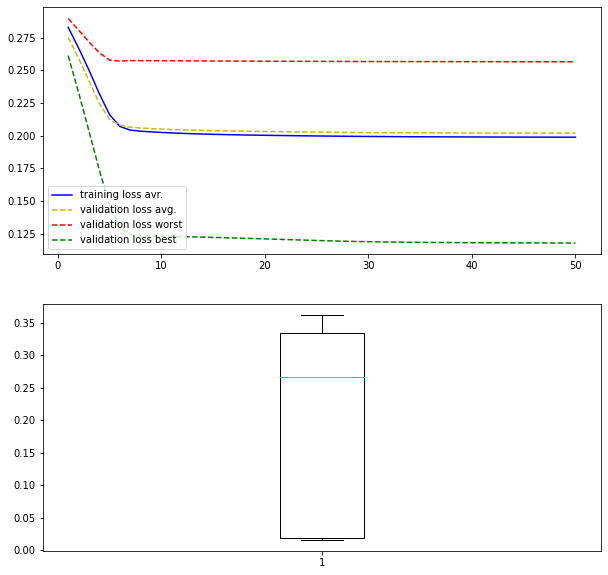

In [6]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V3'], inner_hidden_layer_units=(3,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(3)

Average elapsed k-fold validation time: 57.94395 sec
Last measures: [0.017127033323049545, 0.33387500047683716, 0.021897366270422935, 0.3616250157356262, 0.27811911702156067, 0.25575000047683716, 0.02130306139588356, 0.02296050451695919, 0.3616250157356262, 0.27811911702156067, 0.25575000047683716, 0.020749986171722412, 0.2906250059604645, 0.3616250157356262, 0.020055297762155533, 0.25575000047683716, 0.02010032720863819, 0.2906250059604645, 0.01944546401500702, 0.27811911702156067, 0.25575000047683716, 0.019583817571401596, 0.01900898665189743, 0.3616250157356262, 0.02402823604643345, 0.017479488626122475, 0.01874704472720623, 0.021239865571260452, 0.023414313793182373, 0.021359559148550034]
Loss history average: [0.27237744 0.247288   0.22041366 0.19323142 0.17250701 0.16246702
 0.15925974 0.15839809 0.15787206 0.15742713 0.15704597 0.15672142
 0.15644614 0.15621302 0.15601531 0.1558469  0.15570245 0.15557732
 0.15546754 0.15536973 0.15528095 0.15519882 0.15512138 0.15504699
 0.15497

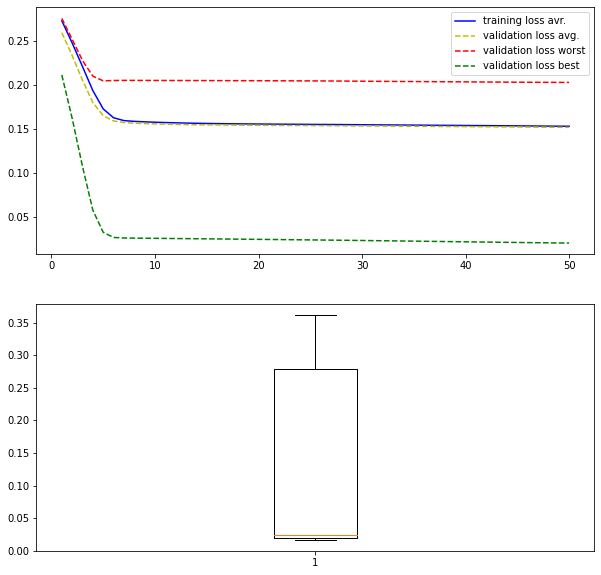

In [7]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V3'], inner_hidden_layer_units=(3,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(4)

Average elapsed k-fold validation time: 50.21976 sec
Last measures: [0.01892433501780033, 0.33387500047683716, 0.2906250059604645, 0.018353238701820374, 0.27811911702156067, 0.017847860231995583, 0.027567172423005104, 0.019992249086499214, 0.3616250157356262, 0.27811911702156067, 0.25575000047683716, 0.33387500047683716, 0.2906250059604645, 0.3616250157356262, 0.27811911702156067, 0.25575000047683716, 0.02759738638997078, 0.2906250059604645, 0.018798936158418655, 0.27811911702156067, 0.020529741421341896, 0.33387500047683716, 0.027329906821250916, 0.01734771952033043, 0.27811911702156067, 0.25575000047683716, 0.02759031020104885, 0.2906250059604645, 0.030140891671180725, 0.27811911702156067]
Loss history average: [0.27573341 0.2612351  0.24805889 0.23552044 0.22348647 0.21366169
 0.20783442 0.20433932 0.20201165 0.20016723 0.19866579 0.19745388
 0.19648432 0.19571524 0.19510998 0.19463691 0.19426915 0.19398422
 0.19376364 0.19359243 0.19345867 0.19335315 0.19326818 0.19319846
 0.193139

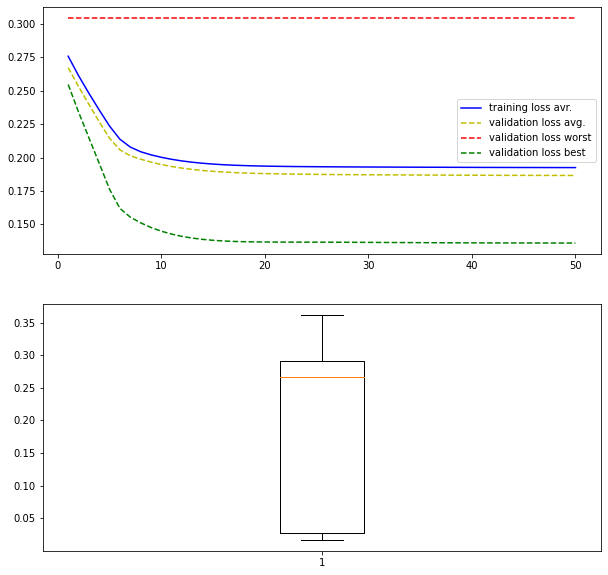

In [8]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V4'], inner_hidden_layer_units=(4,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(4)

Average elapsed k-fold validation time: 57.11804 sec
Last measures: [0.25575000047683716, 0.01855361834168434, 0.027329254895448685, 0.3616250157356262, 0.27811911702156067, 0.017475541681051254, 0.02758944407105446, 0.02084151655435562, 0.3616250157356262, 0.27811911702156067, 0.017392031848430634, 0.020818598568439484, 0.2906250059604645, 0.3616250157356262, 0.27811911702156067, 0.0172202680259943, 0.33387500047683716, 0.01924518123269081, 0.3616250157356262, 0.0201743021607399, 0.017080817371606827, 0.027597228065133095, 0.2906250059604645, 0.01908620074391365, 0.27811911702156067, 0.25575000047683716, 0.02758834883570671, 0.2906250059604645, 0.018779566511511803, 0.27811911702156067]
Loss history average: [0.27315465 0.25114361 0.22733664 0.20225299 0.18403129 0.17704935
 0.1744635  0.17252806 0.17089729 0.16954212 0.16842563 0.1675128
 0.16677166 0.16617358 0.16569322 0.16530834 0.16499985 0.16475156
 0.16455001 0.16438423 0.1642454  0.16412654 0.16402223 0.16392836
 0.1638419  0.

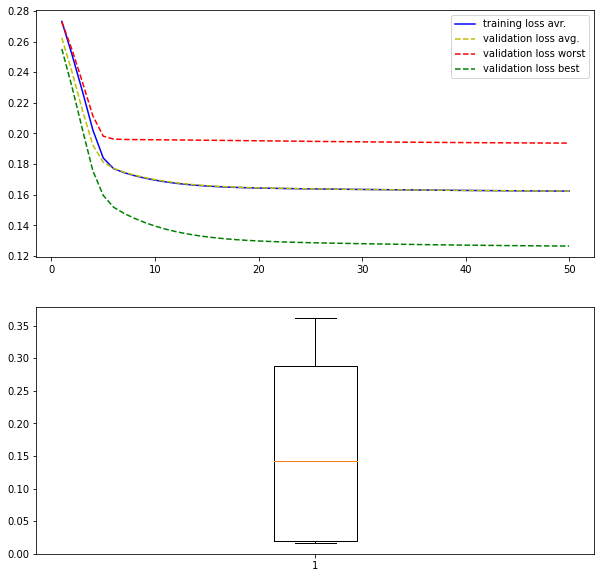

In [9]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V4'], inner_hidden_layer_units=(4,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)